## LAB-2-CVDL MUST QUESTIONS

modify the brightness of image using appropriate filters
modify the contrast of image using various filter and compare their filter
remove noise from the image using linear filter box ,gausian
remove noise from the image using non linear filter
identify the edge in given image using appropriate filter

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

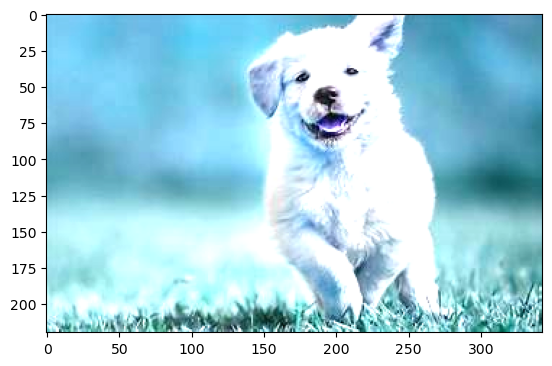

In [3]:
# Brightness Adjustment --> cv2.convertScaleAbs(image, alpha, beta)
#image-orginal img   alpha-->contrast 0 to 1 beta-->brightness [-127,127]
#to lower contrast <1 and high >1
img = cv2.imread("dog.jpg")
alp = 1.5
bet = 1
brightimg = cv2.convertScaleAbs(img, alpha=alp,beta=bet)
plt.imshow(brightimg)
plt.show()

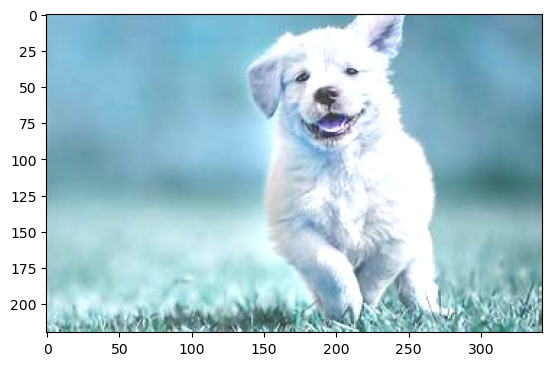

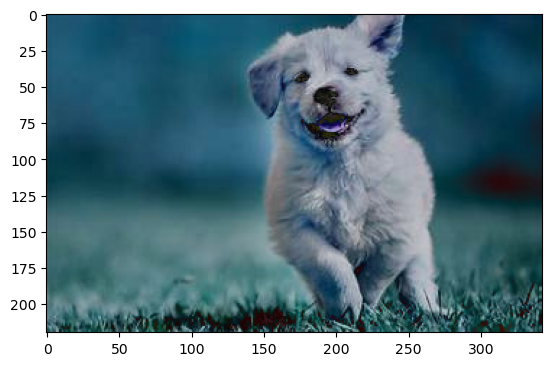

In [8]:
import cv2
import numpy as np

# Increase brightness
brightness_increase = 50
bright_image = cv2.convertScaleAbs(img, alpha=1, beta=brightness_increase)

# Decrease brightness
brightness_decrease = -50
dark_image = cv2.convertScaleAbs(img, alpha=1, beta=brightness_decrease)

# Display results
plt.imshow(bright_image)
plt.show()

plt.imshow(dark_image)
plt.show()

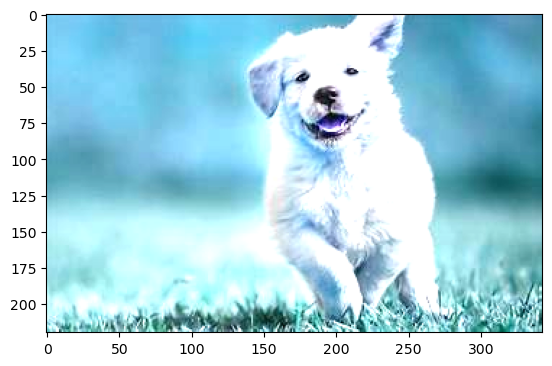

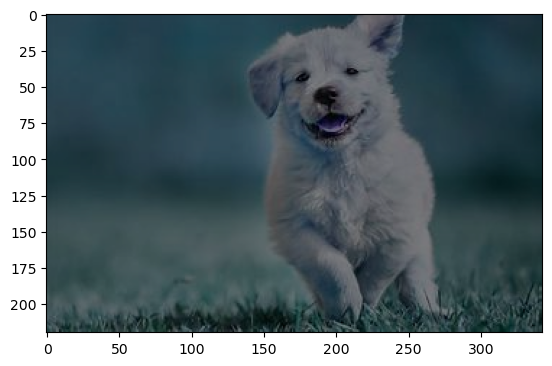

In [10]:
# Increase contrast
contrast_increase = 1.5
high_contrast = cv2.convertScaleAbs(img, alpha=contrast_increase, beta=0)

# Decrease contrast
contrast_decrease = 0.5
low_contrast = cv2.convertScaleAbs(img, alpha=contrast_decrease, beta=0)

plt.imshow(high_contrast)
plt.show()

plt.imshow(low_contrast)
plt.show()

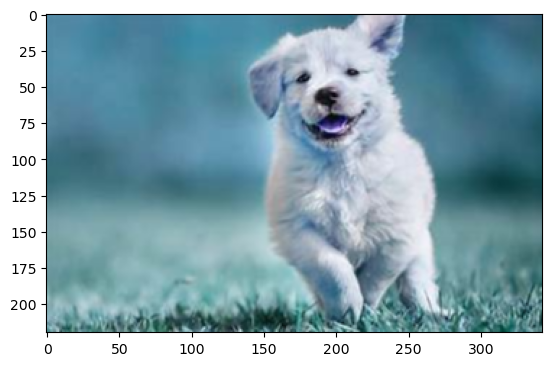

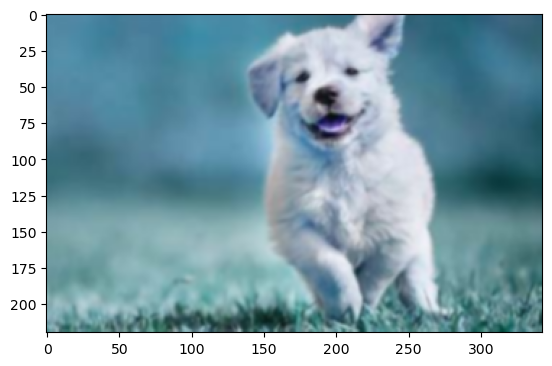

In [14]:
# Box filter
box_filtered = cv2.blur(img, (2, 2))  # Kernel size (5x5)

# Gaussian filter
gaussian_filtered = cv2.GaussianBlur(img, (7, 7), 1)  # Kernel size (5x5), sigmaX=0

plt.imshow(box_filtered)
plt.show()

plt.imshow(gaussian_filtered)
plt.show()

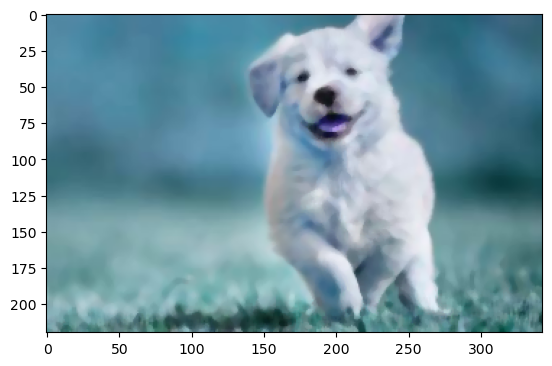

In [19]:
# Median filter (non-linear)
median_filtered = cv2.medianBlur(img, 5)  # Kernel size (5x5)

# Display results
plt.imshow(median_filtered)
plt.show()

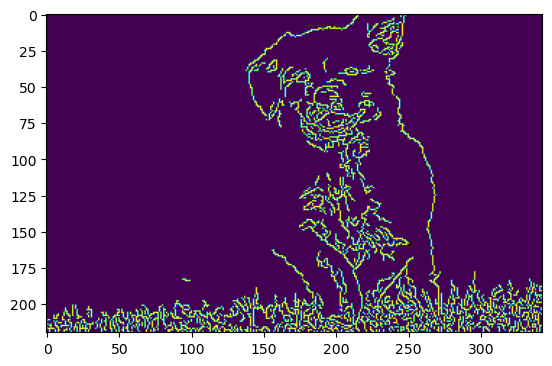

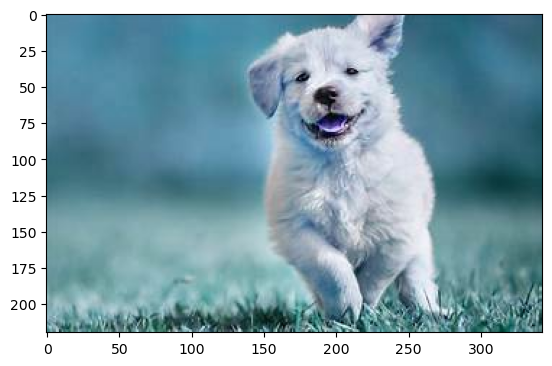

In [17]:
# to identify image edges 
# Convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Canny edge detection
#cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)
#Threshold value of hystersis thresholding
edges_canny = cv2.Canny(gray_image, 100, 200)

# Display results
plt.imshow(edges_canny)
plt.show()

plt.imshow(img)
plt.show()


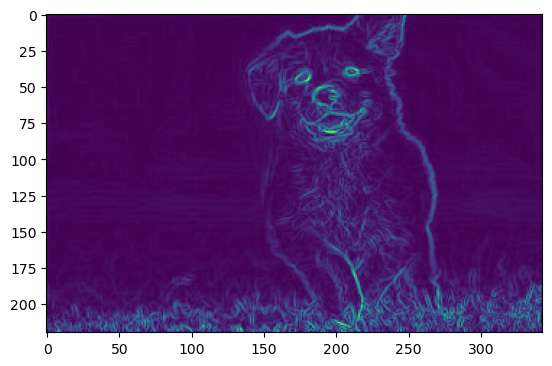

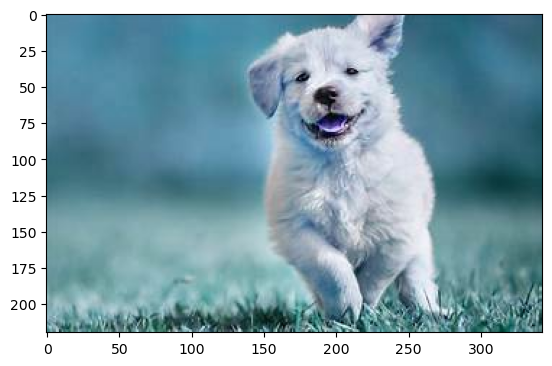

In [23]:
# Sobel edge detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel = cv2.magnitude(sobel_x, sobel_y)

# Display results
plt.imshow(edges_sobel)
plt.show()

plt.imshow(img)
plt.show()

## REMAINING PDF QUESTIONS

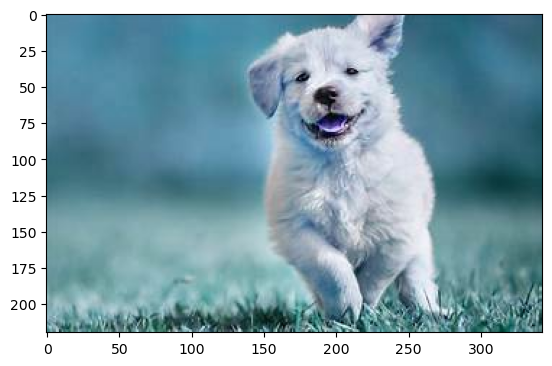

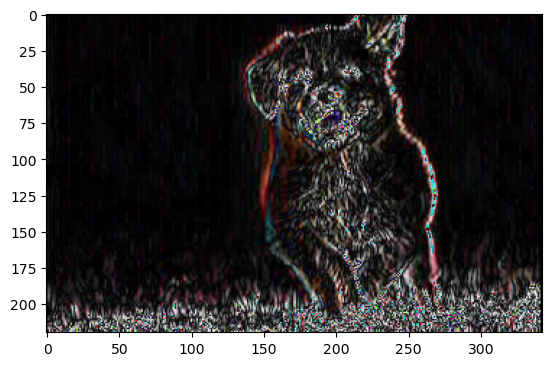

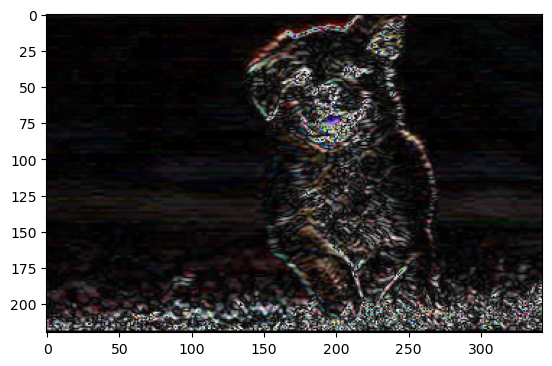

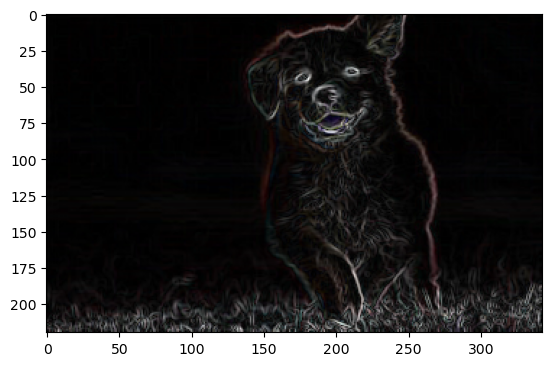

In [14]:
# Write a program to compute the first-order gradients of an image in the x 
# and y directions using Sobel filters. Combine the gradients to visualize 
# edges. 


# Compute Sobel gradients in x and y directions
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x-direction
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y-direction

# Compute the magnitude of the gradients
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normalize the magnitude to range 0-255 for visualization
sobel_magnitude = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Convert to 8-bit image for display
sobel_magnitude = sobel_magnitude.astype(np.uint8)

# Display the results
plt.imshow(img)
plt.show()
plt.imshow(np.abs(sobel_x).astype(np.uint8))
plt.show()
plt.imshow(np.abs(sobel_y).astype(np.uint8))
plt.show()
plt.imshow(sobel_magnitude)
plt.show()

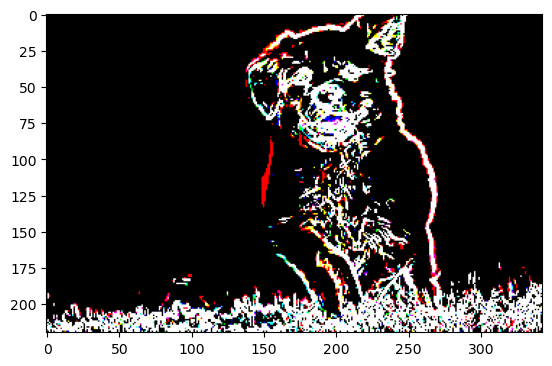

In [13]:
# Modify the program to include edge thresholding (e.g., keeping gradients 
# above a certain value).

# Sobel edge detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Apply thresholding to gradients
_, edge_thresholded = cv2.threshold(sobel_magnitude, 100, 255, cv2.THRESH_BINARY)

# Display results
plt.imshow(edge_thresholded.astype(np.uint8))
plt.show()


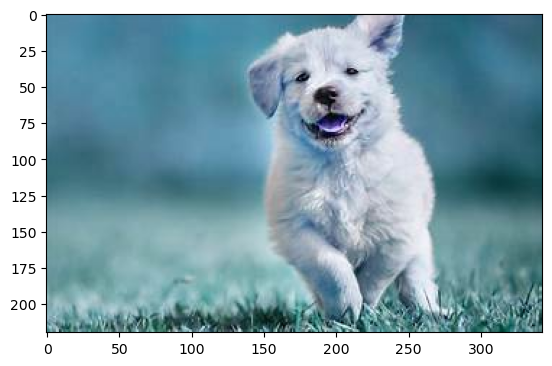

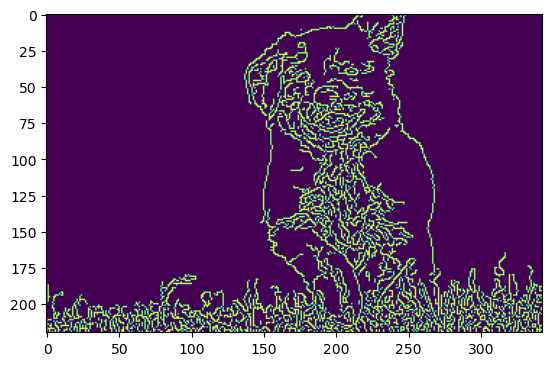

In [15]:
# Apply the Canny edge detection algorithm to an image and display the output
# Apply Canny edge detection
low_threshold = 50  # Lower bound for edge detection
high_threshold = 150  # Upper bound for edge detection
canny_edges = cv2.Canny(img, low_threshold, high_threshold)

# Display the original and edge-detected images
plt.imshow(img)
plt.show()
plt.imshow(canny_edges)
plt.show()


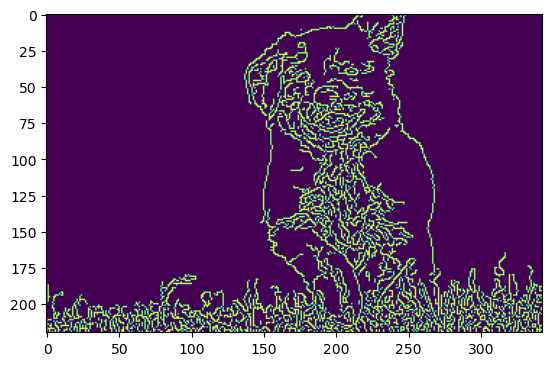

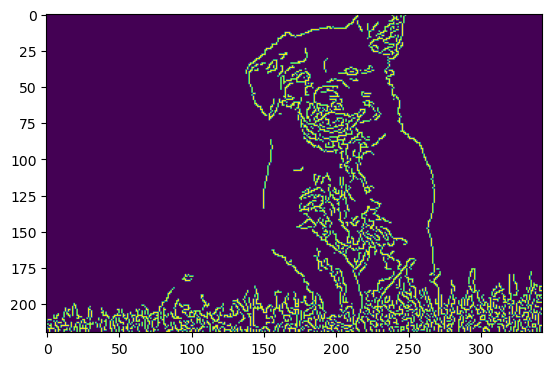

In [11]:
# Experiment with the low and high threshold parameters of the Canny algorithm to observe their effects on edge detection. 
# Apply Canny edge detection with different thresholds
edges_canny_1 = cv2.Canny(img, 50, 150)  # Low threshold: 50, High threshold: 150
edges_canny_2 = cv2.Canny(img, 100, 200)  # Low threshold: 100, High threshold: 200

# Display results
plt.imshow(edges_canny_1)
plt.show()

plt.imshow(edges_canny_2)
plt.show()

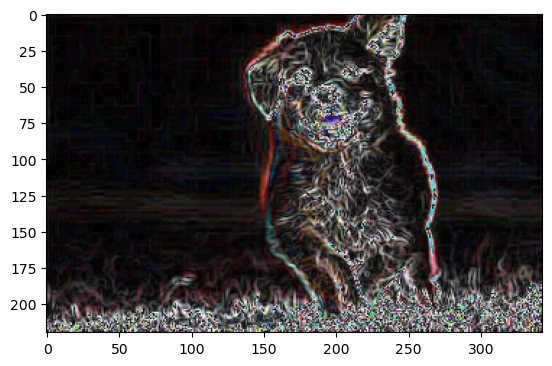

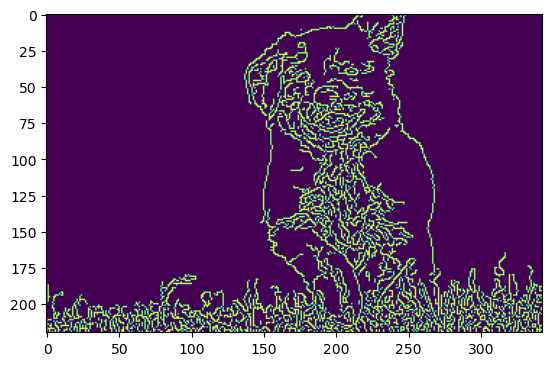

In [8]:
# Compare the edges detected by Canny and Sobel methods on the same image. 
# Sobel edge detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y).astype(np.uint8)

# Canny edge detection
canny_edges = cv2.Canny(img, 50, 150)

# Display results side by side
plt.imshow(sobel_edges)
plt.show()

plt.imshow(canny_edges)
plt.show()

In [16]:
# Write a program to compute second-order gradients using the Laplacian operator. 
# Laplacian edge detection
laplacian_edges = cv2.Laplacian(gray_image, cv2.CV_64F, ksize=3)

# Display results
plt.imshow(laplacian_edges.astype(np.uint8))
plt.show()

NameError: name 'gray_image' is not defined

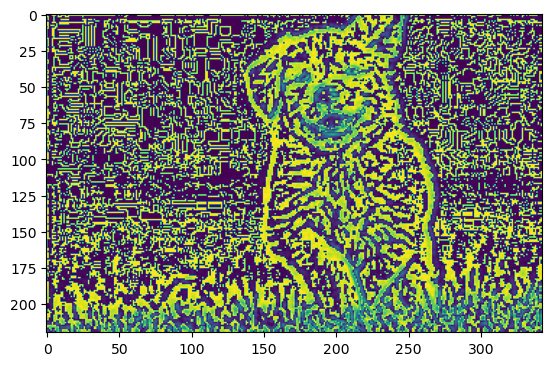

In [19]:
#  Apply Gaussian blurring to an image and then compute edges using the  Laplacian operator. 
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Compute edges using Laplacian
laplacian_blurred_edges = cv2.Laplacian(blurred_image, cv2.CV_64F, ksize=3)

# Display results
plt.imshow( laplacian_blurred_edges.astype(np.uint8))

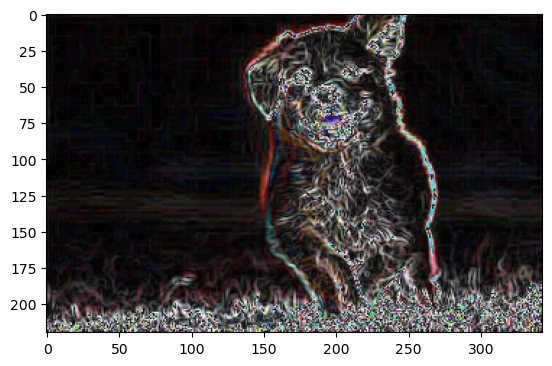

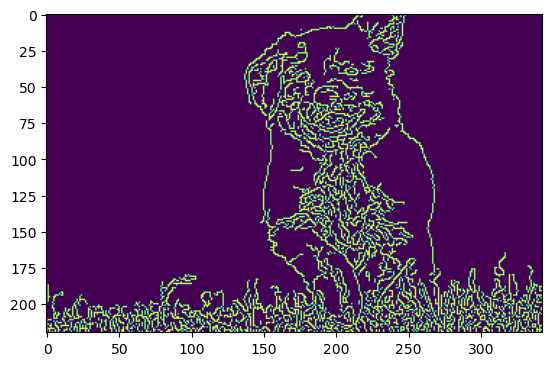

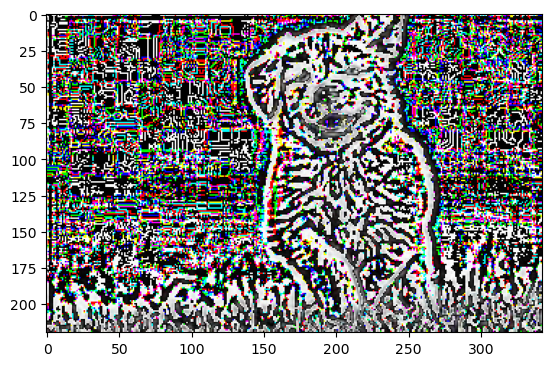

In [35]:
# Apply Sobel, Canny, and LoG edge detection to the  image and display their outputs side by side. 
# Sobel edge detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y).astype(np.uint8)

# Canny edge detection
canny_edges = cv2.Canny(img, 50, 150)

# Laplacian of Gaussian (LoG)
blurred_image = cv2.GaussianBlur(img, (5, 5), 0)
log_edges = cv2.Laplacian(blurred_image, cv2.CV_64F, ksize=3).astype(np.uint8)

# Display results
plt.imshow( sobel_edges)
plt.show()

plt.imshow( canny_edges)
plt.show()

plt.imshow( log_edges)
plt.show()

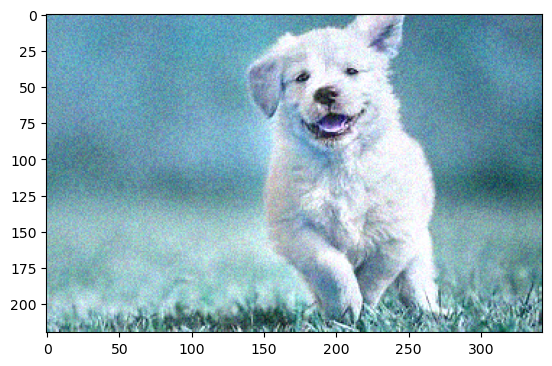

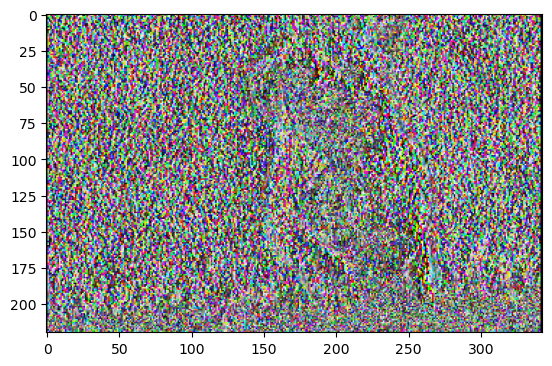

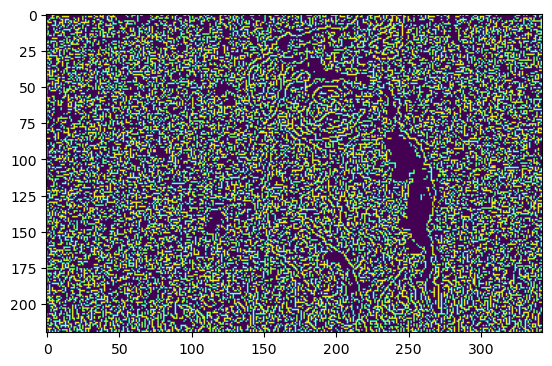

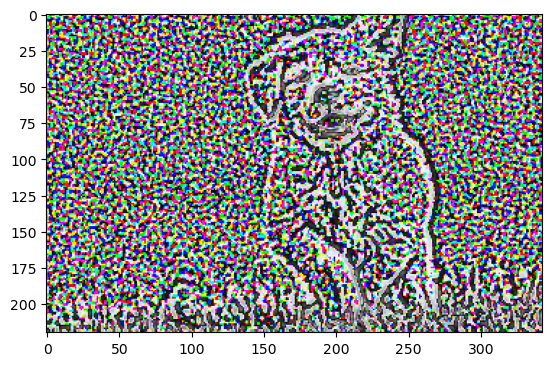

In [26]:
# Add random noise to an image and test edge detection using Sobel,
#Canny, and LoG.
# Add random noise
noise = np.random.randint(0, 50, img.shape, dtype=np.uint8)
noisy_image = cv2.add(img, noise)

# Edge detection on noisy image
sobel_noisy = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
canny_noisy = cv2.Canny(noisy_image, 50, 150)
log_noisy = cv2.Laplacian(cv2.GaussianBlur(noisy_image, (5, 5), 0), cv2.CV_64F, ksize=3)


#ax =  plt.subplot(figsize=(10,6))
# Display results
plt.imshow(noisy_image)
plt.show()
plt.imshow( sobel_noisy.astype(np.uint8))
plt.show()

plt.imshow(canny_noisy)
plt.show()

plt.imshow(log_noisy.astype(np.uint8))
plt.show()
